Basically, under which class does the new data point fall into? K-NN helps in deciding that. The most noob model I've ever come across. It is so noob that he wasn't invited to SVM's party.

In [1]:
from IPython.display import Image

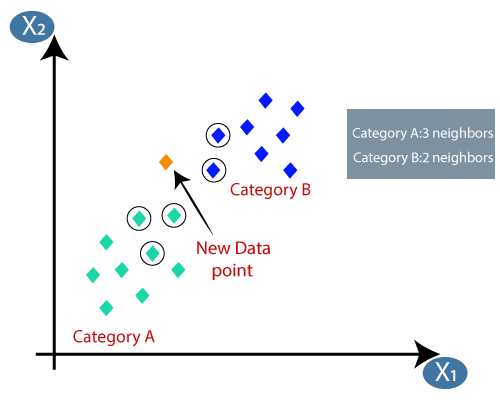

In [3]:
Image('CAPTURE.PNG', embed=True)

**STEP 1  :**  Choose the number K of neighbors (hyper parameter)

**STEP 2  :** Take K data points which are closest to the new data point 

**STEP 3  :** Among these K points, count the number of data points in each class

**STEP 4  :** Assign the new data point to the class where you counted the most neighbors in STEP 3

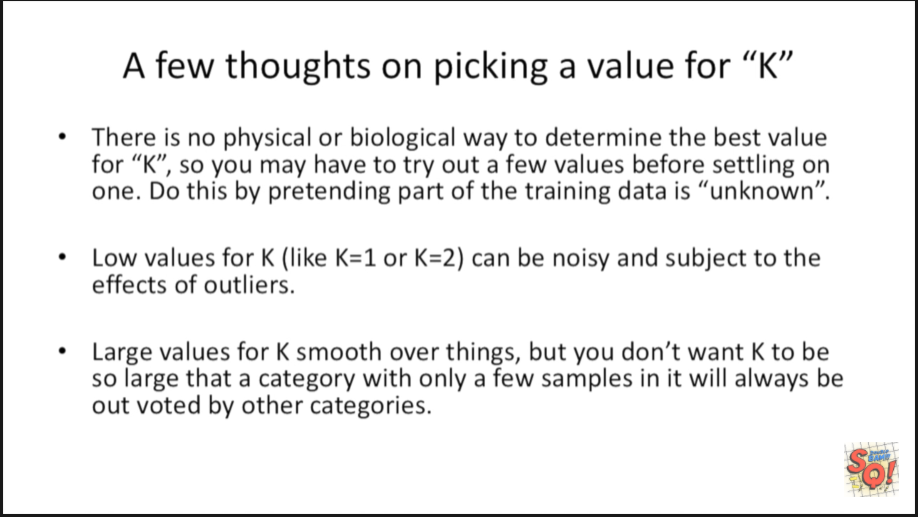

In [7]:
Image('Capture1.PNG', embed=True, width=600, height=500)

We can also use K-NN in regression setting i.e 

**STEP 1  :**  Choose the number K of neighbors (hyper parameter)

**STEP 2  :** Take K data points which are closest to the new data point 

**STEP 3  :** Take the average Y value of these K data points

**STEP 4  :** Assign the new data point the value of average calculated in previous step.

**NOTE OUTLIERS CAN GREATLY AFFECT K-NN MODEL.**

<font size='3'>The underlying algorithm remaining same, `sklearn.neighbors.KNearestNeighbors` can use 3 different algorithms to compute the nearest neighbors i.e :
1. KDtree
2. Balltree
3. Brute force
</font>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier as KNN

In [3]:
pwd

'D:\\Yash\\ML\\ML learnings\\Classification\\K-NN'

In [4]:
df = pd.read_csv('Social_Network_Ads.csv', )
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [19]:
%matplotlib inline

[]

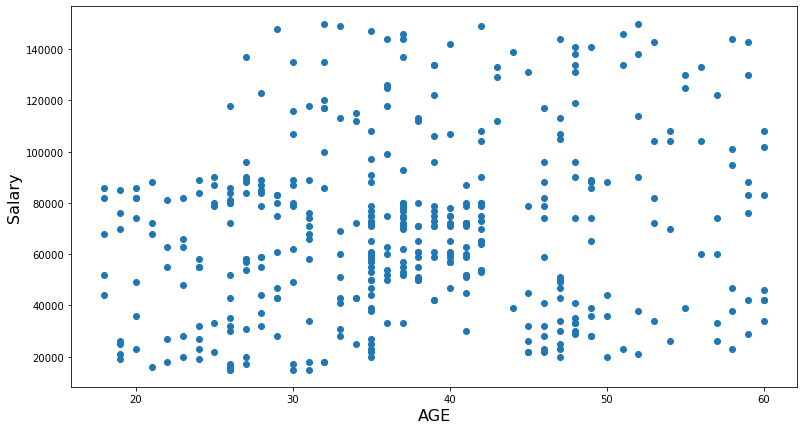

In [20]:
plt.figure(figsize=(13,7))
plt.scatter(df.Age, df.EstimatedSalary)
plt.xlabel('AGE', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.plot()

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


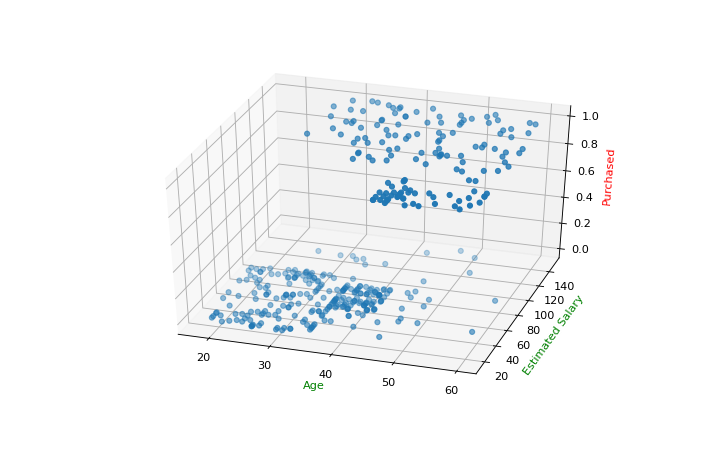

In [22]:
# 3D interactive scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df.Age, df.EstimatedSalary/1000, df.Purchased)
ax.set_xlabel('Age', c='green')
ax.set_ylabel('Estimated Salary',c='green')
ax.set_zlabel('Purchased', c='red')
plt.show()

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [27]:
# Feature Scaling
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [33]:
# Model
model = KNN(n_neighbors=5, weights='uniform',algorithm='auto',leaf_size=30, p=2, metric='minkowski')
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [52]:
y_pred = model.predict(X_test)

In [58]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [61]:
print(confusion_matrix(Y_test, y_pred))
print("accuracy score :", accuracy_score(Y_test, y_pred))
# not bad at all

[[51  3]
 [ 3 23]]
accuracy score : 0.925


In [66]:
%matplotlib inline

<IPython.core.display.Javascript object>


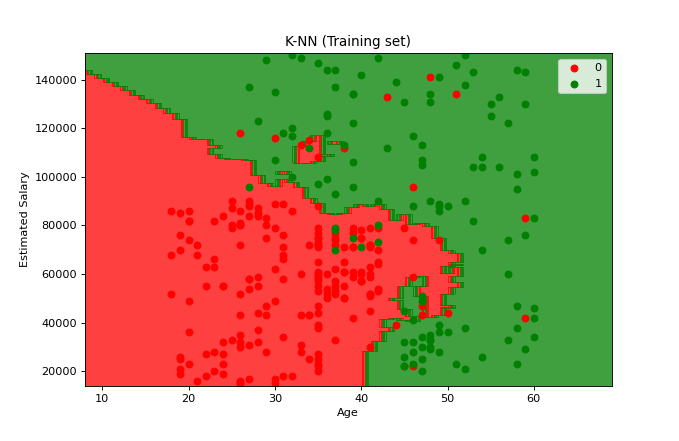

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = SC.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(SC.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


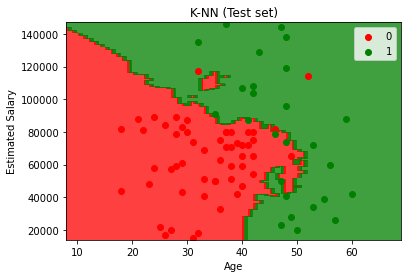

In [67]:
X_set, y_set = SC.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(SC.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [8]:
# Precision & Recall
# https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/